In [36]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline

In [37]:
f=np.load('fit_ejercise.npy')


<ErrorbarContainer object of 3 artists>

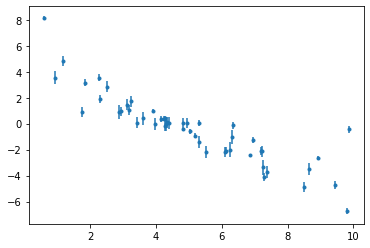

In [38]:
x=f[0]
y=f[1]
err=f[2]
plt.errorbar(x, y, yerr=err,  xerr=None, fmt='.', label='data')

In [39]:
def line (x,m,b):                       # Modelo a probar
    return ((m*x)+b)



In [40]:
def chisq(theta, data):                 # Donde theta son los datos que se generan a aprtir del montecarlo 
    x= data[0]                          # (theta(0) es la pendiente (a) y theta(1) es la ordenada al origen (b))
    y= data[1]
    yerr= data[2]
    #lo siguiente depende del modelo 
    model= line(x, theta[0], theta[1])
    chisq= (y-model)**2 / yerr**2
    return chisq.sum()

def comparacion(chisq_ini, chisq_new):  #funcioón para comparar los modelos
    a=np.log(np.random.uniform(0,1))
    
    if chisq_new < chisq_ini:
        chisq_ini= chisq_new
        acc=True
        
    elif (chisq_ini-chisq_new) > a:
        chisq_ini= chisq_new
        acc=True
    
    else: 
        chisq_ini= chisq_ini
        acc=False
            
    return chisq_ini, acc

def montecarlo(a_ini, b_ini, data, s2, n):  #donde s2 esel sigma cuadrada
    
    chisqr_stor=np.zeros(n)
    a=np.zeros(n)
    b=np.zeros(n)
    k=0               #Contador devalores acepados
    
    for i in range(n):
    
        a[i]=a_ini
        b[i]=b_ini
    
        a_new =s2* np.random.randn()+ a_ini
        b_new =s2* np.random.randn()+ b_ini   #Se generan los nuevos pares de parámetros
    
        chisqr_ini=chisq([a_ini,b_ini], data)
        chisqr_new=chisq([a_new,b_new], data)
        chisqr_stor[i]= chisqr_ini


        chisq_comp,acc= comparacion(chisqr_ini, chisqr_new)
            
        if acc is not True: # == chisqr_ini:
            a_ini=a_ini
            b_ini=b_ini
        else:
            a_ini=a_new
            b_ini=b_new
            k= k + 1
        
    
    return a, b, chisqr_stor, k
    

In [41]:

m, b= -2.5,3.5
parametros=montecarlo(m, b, [x, y, err], 0.01, 10000)
m=parametros[0]
b=parametros[1]
k= parametros[3]
k

4640

Text(0, 0.5, '[3.5        3.5        3.5        ... 5.49950743 5.51564557 5.51564557]')

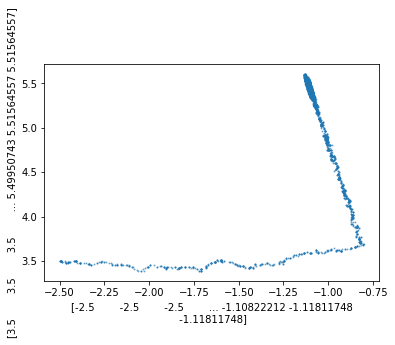

In [43]:
scat=plt.scatter(m, b, s=1, alpha=0.5) 
plt.xlabel(m)
plt.ylabel(b)
#plt.legend(frameon = True)


(array([  84.,  410.,  978., 1423., 1633., 1473., 1203.,  622.,  161.,
          13.]),
 array([-1.13247931, -1.12681933, -1.12115935, -1.11549937, -1.10983939,
        -1.10417941, -1.09851943, -1.09285945, -1.08719947, -1.08153949,
        -1.07587951]),
 <a list of 10 Patch objects>)

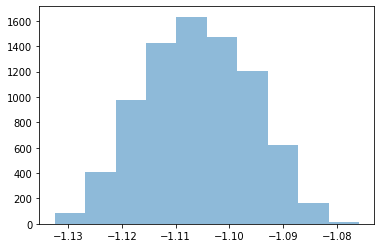

In [44]:
plt.hist(m[2000:], alpha=0.5)

In [45]:
m_mean=mean(m[2000:])
m_mean

-1.1059672548386075

(array([  53.,  383.,  997., 1256., 1319., 1190., 1244.,  967.,  511.,
          80.]),
 array([5.31407489, 5.34117439, 5.36827389, 5.39537339, 5.42247289,
        5.44957239, 5.47667189, 5.50377139, 5.53087089, 5.55797039,
        5.58506989]),
 <a list of 10 Patch objects>)

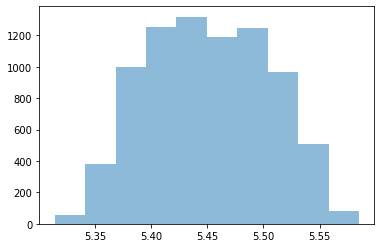

In [46]:
plt.hist(b[2000:], alpha=0.5)

In [47]:
b_mean=mean(b[2000:])
b_mean

5.451208052211885

In [48]:
x_val=np.random.uniform(-1,11, 15)
y_val= (m_mean)*x_val +b_mean
print(len(x_val), len(y_val))

15 15


Text(0, 0.5, 'y')

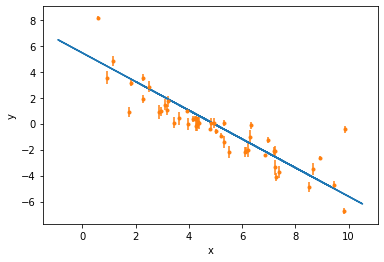

In [49]:
plot(x_val,y_val,'-', label='model')
plt.errorbar(x, y, yerr=err,  xerr=None, fmt='.', label='data')
plt.xlabel('x')
plt.ylabel('y')

### Para el caso de Pk en cosmología 

In [14]:
from colossus.cosmology import cosmology


In [15]:
cosmo = cosmology.setCosmology('planck15')
print(cosmo)

Cosmology "planck15" 
    flat = True, Om0 = 0.3089, Ode0 = 0.6910, Ob0 = 0.0486, H0 = 67.74, sigma8 = 0.8159, ns = 0.9667
    de_model = lambda, relspecies = True, Tcmb0 = 2.7255, Neff = 3.0460, powerlaw = False


In [16]:
#Modificando la cosmología

cosmo.Om0=0.29
cosmo.Omde=0.71
cosmo.ns=0.97
cosmo.H0=70
cosmo.relspecies=False
cosmo.checkForChangedCosmology()
print(cosmo)

Cosmology: Detected change in cosmological parameters.
Cosmology "planck15" 
    flat = True, Om0 = 0.2900, Ode0 = 0.7100, Ob0 = 0.0486, H0 = 70.00, sigma8 = 0.8159, ns = 0.9700
    de_model = lambda, relspecies = False, Tcmb0 = 2.7255, Neff = 3.0460, powerlaw = False


In [17]:
pk=np.loadtxt("pk.txt").T

(100, 300000.0)

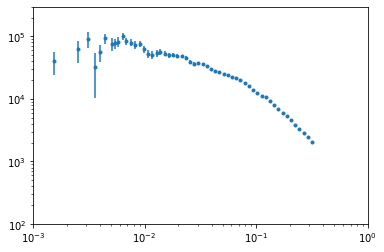

In [18]:
plt.loglog()
plt.errorbar(pk[0],pk[1], yerr=pk[2], fmt='.' )
plt.xlim(1e-3,1)
plt.ylim(100,3e5)

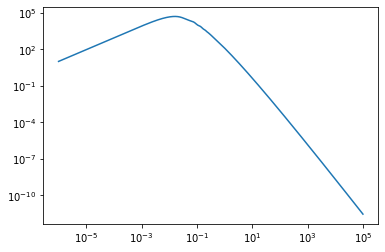

In [19]:
k=10**np.linspace(-6,5,100000)
Pk=cosmo.matterPowerSpectrum(k,0.57)
plt.loglog()
plt.plot(k, (1.85 **2) * Pk, '-')

In [20]:
cosmo = cosmology.setCosmology('planck15')
print(cosmo)

def Pk_Om(Om_,b, k, z):
    cosmo.Om0=Om_
    return (b**2)*cosmo.matterPowerSpectrum(k,z)



Cosmology "planck15" 
    flat = True, Om0 = 0.3089, Ode0 = 0.6910, Ob0 = 0.0486, H0 = 67.74, sigma8 = 0.8159, ns = 0.9667
    de_model = lambda, relspecies = True, Tcmb0 = 2.7255, Neff = 3.0460, powerlaw = False


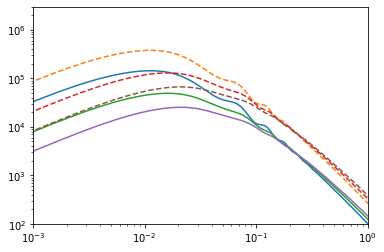

In [21]:
plt.figure()
plt.loglog()

OM=[0.2,0.3, 0.4]
for om in OM:
    plt.plot(k,Pk_Om(om, 1.85, k, 0.57), '-')
    plt.plot(k,Pk_Om(om, 3, k, 0.57), '--')
    
    plt.xlim(1e-3,1)
    plt.ylim(100,3e6)
    #plt.savefig('/Users/stefany/Desktop/dif_pk.pdf')



In [22]:
def chisq2(theta, data):                 # Donde theta son los datos que se generan a aprtir del montecarlo 
    x= data[0]                          # (theta(0) es la pendiente (a) y theta(1) es la ordenada al origen (b))
    y= data[1]
    yerr= data[2]
    z=0.57
    #lo siguiente depende del modelo 
    model= Pk_Om(theta[0],theta[1], x, z)
    chisq= (y-model)**2 / yerr**2
    return chisq.sum()

In [23]:
chisqr=chisq([0.7,0.4],pk )
chisqr

255808.0630092289

In [24]:
def montecarlo(a_ini, b_ini, data, s2, n):  #donde s2 esel sigma cuadrada
    
    chisqr_stor=np.zeros(n)
    a=np.zeros(n)
    b=np.zeros(n)
    k=0               #Contador devalores acepados
    
    for i in range(n):
    
        a[i]=a_ini
        b[i]=b_ini
    
        a_new =s2* np.random.randn()+ a_ini
        b_new =s2* np.random.randn()+ b_ini   #Se generan los nuevos pares de parámetros
    
        chisqr_ini=chisq2([a_ini,b_ini], data)
        chisqr_new=chisq2([a_new,b_new], data)
        chisqr_stor[i]= chisqr_ini


        chisq_comp,acc= comparacion(chisqr_ini, chisqr_new)
            
        if acc is not True: # == chisqr_ini:
            a_ini=a_ini
            b_ini=b_ini
        else:
            a_ini=a_new
            b_ini=b_new
            k= k + 1
        
    
    return a, b, chisqr_stor, k
    

In [33]:
Om_ini=0.7
b2_ini=0.4
z=0.57        
    
pk_prueba= montecarlo(0.5, 0.6, pk, 0.01, 10000)

param1=pk_prueba[0]
k=pk_prueba[3]
k

421

No handles with labels found to put in legend.


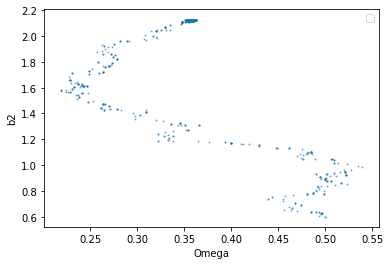

In [34]:
Omega=pk_prueba[0]
b=pk_prueba[1]

scat=plt.scatter(pk_prueba[0], pk_prueba[1], s=1, alpha=0.5) #, label= 'caminante {0}'.format(i))
#plt.xlim(-1.25,-0.75)
#plt.ylim(5,6)
plt.xlabel('Omega')
plt.ylabel('b2')
plt.legend(frameon = True)
k=pk_prueba[3]
acc=k/1000

(array([ 270.,  677., 3255.,  744.,    0.,    0., 1226., 1945.,  766.,
         117.]),
 array([0.35271265, 0.35359351, 0.35447437, 0.35535523, 0.35623609,
        0.35711695, 0.35799781, 0.35887867, 0.35975953, 0.36064038,
        0.36152124]),
 <a list of 10 Patch objects>)

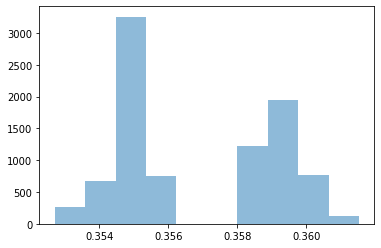

In [35]:
plt.hist(Omega[1000:], alpha=0.5)

In [36]:
Om_mean=mean(Omega[2000:])
Om_mean

0.35682136911626877

(array([  64.,  240., 1437., 1318., 1880., 1507., 1219.,  927.,  313.,
          95.]),
 array([2.11669516, 2.11775935, 2.11882354, 2.11988774, 2.12095193,
        2.12201612, 2.12308031, 2.1241445 , 2.1252087 , 2.12627289,
        2.12733708]),
 <a list of 10 Patch objects>)

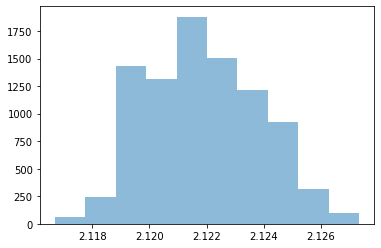

In [37]:
plt.hist(b[1000:], alpha=0.5)

In [38]:
b_mean=mean(b[2000:])
b_mean

2.121841496076707

(100, 300000.0)

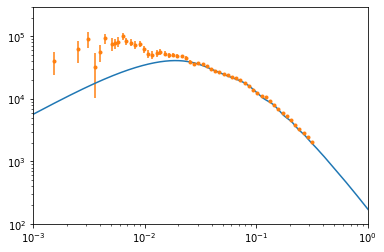

In [39]:
plt.loglog()
k=10**np.linspace(-6,5,100000)
plt.plot(k,Pk_Om(Om_mean, b_mean, k, 0.57), '-', label='valor encontrado')
plt.errorbar(pk[0],pk[1], yerr=pk[2], fmt='.', label='datos' )
plt.xlim(1e-3,1)
plt.ylim(100,3e5)

In [24]:

x=np.linspace(0,2, 20)
x

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [25]:
m=5
b=8
y=m*x + b
y

array([ 8.        ,  8.52631579,  9.05263158,  9.57894737, 10.10526316,
       10.63157895, 11.15789474, 11.68421053, 12.21052632, 12.73684211,
       13.26315789, 13.78947368, 14.31578947, 14.84210526, 15.36842105,
       15.89473684, 16.42105263, 16.94736842, 17.47368421, 18.        ])

In [29]:
for i in range (0,19):
    s=0.5*np.random.uniform()
    y[i]=y[i]+s

In [30]:
y

array([ 8.2967603 ,  8.76235593,  9.40279135, 10.20446837, 10.24499555,
       10.97986272, 11.60667546, 12.05760402, 12.47015549, 13.21604731,
       13.73968455, 14.37435379, 14.70173749, 15.15986908, 15.89642438,
       16.15223745, 16.95749841, 17.39254729, 17.69574545, 18.        ])

<ErrorbarContainer object of 3 artists>

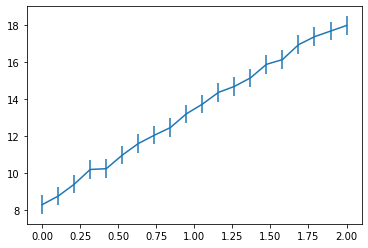

In [32]:
plt.errorbar(x, y, 0.5)

In [33]:
x,y

(array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
        1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]),
 array([ 8.2967603 ,  8.76235593,  9.40279135, 10.20446837, 10.24499555,
        10.97986272, 11.60667546, 12.05760402, 12.47015549, 13.21604731,
        13.73968455, 14.37435379, 14.70173749, 15.15986908, 15.89642438,
        16.15223745, 16.95749841, 17.39254729, 17.69574545, 18.        ]))

In [34]:
def linea(m,x,b):
    return (m*x) +b

In [35]:
def chi(theta,datos):   #theta son los parámetros a probar
    m=theta[0] #datos son los datos de la observación
    b=theta[1]
    x=datos[0]
    y=datos[1]
    err=datos[2]
    y_modelo=linea(m,x,b)
    chi2=(y_mod-y)**2/err**2
    return chi2.sum()